# Homework 11
## Due Nov 16th, 2020

## Fill in your name

In [1]:
first_name = "Shariq"
last_name = "Jamil"

assert(len(first_name) != 0)
assert(len(last_name)  != 0)

## 1) Sudoku

In a Sudoku puzzle, the player tries to fill a square with a 
number from 1 to 9.  The number must not already appear in the same row,
column, or 3x3 square.

You are given 3 lists, holding the values already seen in a
row, column, and square.  Produce a list of the legal remaining
values.  

Your solution should use one or more List Comprehensions for full credit.

In [2]:
def legal_values(row, col, square):
    # array to hold status of numbers 1-9. 0 will be sliced later
    values = [0] * 10
    # create an array with the three input arrays
    all_vals = row+col+square
    
    # mark by index if a value is found
    for val in all_vals:
        values[val] = 1
    # slice 0th value off
    values = values[1:]
    # fetch missing values by index. add 1 to convert index to value represented
    remaining_vals = [ind+1 for ind, x in enumerate(values) if x == 0]
    return remaining_vals

## Unit tests for Sudoku

In [3]:
def test_sudoku():
    assert(legal_values([1], [4], [7]) == [2, 3, 5, 6, 8, 9])
    assert(legal_values([1, 2, 3], [4, 5, 6], [7, 8, 9]) == [])
    assert(legal_values([1, 2, 3], [1, 2, 3], [7, 8, 9]) == [4, 5, 6])
    assert(legal_values([1, 3, 5], [1, 4, 8], [7, 8, 9]) == [2, 6])
    assert(legal_values([1, 3, 5, 7, 9], [2, 4, 6, 8], [7, 9]) == [])
    assert(legal_values([1, 5, 7, 9], [2, 4, 8], [7, 9]) == [3, 6])
    print('Success!')
    
test_sudoku()

Success!


## 2) Graph Global Mile records

Take a look at the data here: you can harvest it from the web, or use a CSV file we'll provide.  

https://github.com/KarenWest/FundamentalsOfDataAnalysisInLanguageR/blob/master/WorldRecords.csv

We haven't discussed many of the points below: you will need to explore the documentation on your own. 

https://matplotlib.org/3.2.1/contents.html
    
The CSV file has many records. 
Plot the world records for the mile.  Let X be the year and Y be the time in seconds.  

Map the Mens and Womens records on the same graph in different colors.

Since records for men and women were set in different years, you won't be able to use plot().  Use a scatter plot instead.

Make sure your X and Y values are numbers, rather than the strings in the table.  
Include labels for the X and Y axis, and a legend telling us what the colors mean.

Include a horizontal line at y = 240: the 4 minute barrier has been a touchstone and a benchmark for years.    

You will want the Y axis to include 0 so that we can judge the times relative to the time it takes to run a mile, but you don't want to include the origin: you don't want to go back to 0 AD.  We don't have good records until the 20th century.  

### Hint: here are some matplotlib calls to investigate

```python
    plt.scatter()     # Be sure to investigate the optional parameters
    plt.legend()
    plt.xlabel()
    plt.ylabel()
    plt.ylim()
```

## Your Solution

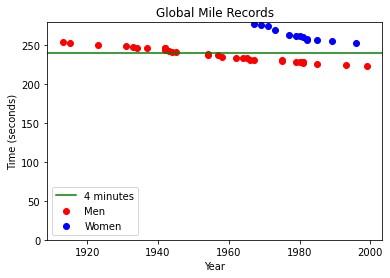

In [4]:
import csv
import matplotlib.pyplot as plt

with open('WorldRecords.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    # instantiate lists needed for scatter plots
    men_time = []
    men_year = []
    women_time = []
    women_year = []
    
    # iterate through file
    for row in csv_reader:
        # store Men's mile data
        if 'Mens Mile' in row[0]:
            men_time.append(float(row[2]))
            men_year.append(int(row[6]))
        # store Women's mile data
        elif 'Womens Mile' in row[0]:
            women_time.append(float(row[2]))
            women_year.append(int(row[6]))
    
    fig, ax = plt.subplots()
    # add mens scatter plot
    ax.scatter(men_year, men_time, color='r', label='Men')
    # add womens scatter plot
    ax.scatter(women_year, women_time, color='b', label='Women')
    # 4 minute line
    ax.axhline(y=240, color='g', linestyle='-', label='4 minutes')
    # set axis labels
    ax.set_xlabel('Year')
    ax.set_ylabel('Time (seconds)')
    # start y-axis at 0
    ax.set_ylim(0)
    ax.set_title('Global Mile Records')
    # display legend
    ax.legend()
    plt.show()
    

## 3) People

We define a class Person which describes a citizen with a name.
Students and Employees are subclasses of Persons.

You will need to redefine, or override, methods for the subclasses to make the tests below pass.

We have made a start defining a Student, but have done nothing for Employee.  Read the Unit Tests to see what you will need to add or change.  

In [5]:
class Person:

    def __init__(self, first, last):
        self.firstname = first.capitalize()
        self.lastname = last.capitalize()

    def __str__(self):
        return self.firstname + " " + self.lastname

    def __eq__(self, other):
        return (self.firstname == other.firstname) \
            and (self.lastname == other.lastname)

    def is_employed(self):
        return False


class Student(Person):
    "Person who is a student"

    def __init__(self, first, last, school, id):
        # Call Superclass to set common information
        super().__init__(first, last)
        self.school = school
        self.id = id

    def __str__(self):
        # Call Superclass to dispaly common information
        return super().__str__() + ", " + str(self.id) + ' at ' + self.school

    def __eq__(self, other):
        if not hasattr(other, 'school'):
            return False
        return super().__eq__(other) and (self.id == other.id) and self.school and self.school == other.school

    
class Employee(Person):
    "Person who is employed"
    def __init__(self, first, last, company, id):
        # Call Superclass to set common information
        super().__init__(first, last)
        self.company = company
        self.id = id

    def __str__(self):
        # Call Superclass to dispaly common information
        return super().__str__() + ", " + str(self.id) + ' at ' + self.company

    def __eq__(self, other):
        if not hasattr(other, 'company'):
            return False
        return super().__eq__(other) and (self.id == other.id) and self.company == other.company


## Unit Tests for Person

In [6]:
def test_person():
    
    # People
    man1 = Person("Homer", "Simpson")
    man2 = Person("homer", "simpson")
    assert man1 == man2
    assert not man1.is_employed()
    assert man1.__str__() == 'Homer Simpson'
    assert man2.__str__() == 'Homer Simpson'
    
    # Students
    woman1 = Student("Marge", "Simpson", 'Simmons', 107)
    woman2 = Student("Marge", "Simpson", 'Wheelock', 153)
    assert woman1.__str__() == "Marge Simpson, 107 at Simmons"
    assert woman2.__str__() == "Marge Simpson, 153 at Wheelock"
    assert not woman1 == woman2

    # Employees
    moe1 = Employee("Moe", "Szyslak", 'Tavern', 153)
    assert moe1.__str__() == "Moe Szyslak, 153 at Tavern"
    assert not moe1 == woman2

    moe = Employee("Moe", "Szyslak", 'Tavern', 153)
    assert moe.__str__() == "Moe Szyslak, 153 at Tavern"
    assert not moe == woman2

    waylon = Employee("Waylon", "Smithers", "Springfield Power", 2)
    assert not moe == waylon
   
    # Cross Check
    moe2 = Student("Moe", "Szyslak", 'BC', 153)
    assert moe2.__str__() == "Moe Szyslak, 153 at BC"
    assert not moe == moe2
    assert not moe2 == moe

    print('Success!')
    
test_person()

Success!


## 4) Anagram

Each word in words.txt belongs to a set of words that are anagrams. Some sets have a single elment - no word is an anagram for 'aa'. Some words have a single anagram (veins and vines). Some words have many anagrams. We are looking for the largest set of anagrams.  Take a filename and return a list of the sets of anagrams, sorted by size.  The unit tests look for the largest sets.    

Your function should return a list of tuples: each tuple holds the length of the set, and then a list of members, such as

```python
[ (3,['anergias','angaries','arginase']), (3,['amain','amnia','anima']), (3,['alien','aline','anile']) ...]
```

For the file shorterwords.txt, which holds 5K words, these are the three largest sets of anagrams.    

There are two challenges to this problem: finding the right answer, and finding the right answer quickly.  We will give extra credit if you can find the sets for words.txt in under 2 seconds.  It takes my solution a fraction of a second on an 8 year old laptop.  


We provide Unit Tests to call your function three times: once to examine a file 5K items shorter.txt, once for 10K items, short.txt, and once to examine the full list, words.txt. You only need to define find_anagrams once, in the first cell. 

```python
from typing import List

def find_anagrams(path: str) -> List:
    "Find the largest set of anagrams, return as sorted list"
    pass
```

### *A dictionary would help: but what mapping should it represent?*

## Your solution

In [11]:
from typing import List

def find_anagrams(path: str) -> List:
    "Find the largest sets of anagrams.  Return a list of all sets, sorted by size"
    # dict for holding sorted words and corresponding anagrams
    anagram_dict = {}
    # read specified file
    inputfile = open(path, "r")
    # place all the line seperated words in a list
    words = inputfile.read().splitlines()
    for word in words:
        # get sorted version of the word
        s_wrd = sorted(word)
        s_wrd = ''.join(s_wrd)
        # if the sorted version has not been seen yet
        if s_wrd not in anagram_dict:
            # store in dict
            anagram_dict[s_wrd] = (1,[word])
        else:
            # anagram found
            val = anagram_dict[s_wrd]
            # store in dict and update frequency
            freq_cnt = val[0] + 1
            freq_words = val[1]
            freq_words.append(word)
            val = (freq_cnt,freq_words)
            anagram_dict[s_wrd] = val    
    # sort dictoinary by frequency
    # https://stackoverflow.com/questions/1217251/python-sorting-a-dictionary-of-lists
    sortedDict = sorted(anagram_dict.items(), key=lambda e: e[1][0], reverse=True)
    # create a new list with anagrams sorted by frequency
    ret_obj = [x[1] for x in sortedDict]
    return ret_obj

## Search the file of 5K words

```python
    lst = find_anagrams('shorter.txt')
    for anagrams in lst[:3]:
        print(anagrams)
```
Should yield, in some order.  The times might be aspirational.

```python
(3, ['anergias', 'angaries', 'arginase'])
(3, ['amain', 'amnia', 'anima'])
(3, ['alien', 'aline', 'anile'])
CPU times: user 11.9 ms, sys: 4.13 ms, total: 16 ms
Wall time: 49.1 ms
```

In [12]:
%%time
lst = find_anagrams('shorter.txt')
for anagrams in lst[:3]:
    print(anagrams)

(3, ['alien', 'aline', 'anile'])
(3, ['amain', 'amnia', 'anima'])
(3, ['anergias', 'angaries', 'arginase'])
CPU times: user 12.5 ms, sys: 3.63 ms, total: 16.2 ms
Wall time: 15.4 ms


## Unit test on set of 10K Words

You will need a copy of the 10K word file, short.txt.

The test below should show the 6 largest sets of anagrams

The first line of my output is

```python
(6, ['abets', 'baste', 'bates', 'beast', 'beats', 'betas'])
...
CPU times: user 15.5 ms, sys: 1.73 ms, total: 17.2 ms
Wall time: 35.4 ms
```

In [13]:
%%time
lst = find_anagrams('short.txt')
for anagrams in lst[:6]:
    print(anagrams)

(6, ['abets', 'baste', 'bates', 'beast', 'beats', 'betas'])
(5, ['albas', 'baals', 'balas', 'balsa', 'basal'])
(4, ['abet', 'bate', 'beat', 'beta'])
(4, ['ardeb', 'barde', 'bared', 'beard'])
(4, ['basest', 'basset', 'bastes', 'beasts'])
(4, ['bestir', 'bister', 'bistre', 'biters'])
CPU times: user 44.7 ms, sys: 433 µs, total: 45.1 ms
Wall time: 53 ms


## Extra credit: find the top 5 sets in full words.txt in less than 2 seconds

You will need to process words.txt, the file of 114K words.

The call '%time' will report how long your run took.  

My output starts like this:

```pytho
(11, [...
(11, [...
(10, [...
...
CPU times: user 226 ms, sys: 8.06 ms, total: 234 ms
Wall time: 233 ms
```

In [14]:
%%time
lst = find_anagrams('words.txt')
for anagrams in lst[:5]:
    print(anagrams)

(11, ['alerts', 'alters', 'artels', 'estral', 'laster', 'ratels', 'salter', 'slater', 'staler', 'stelar', 'talers'])
(11, ['apers', 'asper', 'pares', 'parse', 'pears', 'prase', 'presa', 'rapes', 'reaps', 'spare', 'spear'])
(10, ['least', 'setal', 'slate', 'stale', 'steal', 'stela', 'taels', 'tales', 'teals', 'tesla'])
(9, ['capers', 'crapes', 'escarp', 'pacers', 'parsec', 'recaps', 'scrape', 'secpar', 'spacer'])
(9, ['estrin', 'inerts', 'insert', 'inters', 'niters', 'nitres', 'sinter', 'triens', 'trines'])
CPU times: user 396 ms, sys: 7.2 ms, total: 403 ms
Wall time: 402 ms


## Post Mortem

How long did it take you to solve this problem set?

Did anything confuse you or cause difficulty?

In [ ]:
# Your thoughts
# About 6 hours. Nothing confusing or difficult. 